<a href="https://colab.research.google.com/github/AyaEbrahim01/CovidUseCase/blob/main/NTI_Covid_usecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
cases = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [ ]:
print (cases.head())
print (deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  3/9/22  \
0  32.539527 -86.644082  ...  15530   15530   15530   15539   15547   15555   
1  30.727750 -87.722071  ...  55079   55079   55079   55132   55135   55142   
2  31.868263 -85.387129  ...   5447    5447    5447    5451    5454    5456   
3  32.996421 -87.125115  ...   6381    6381    6381    6395    6395    6398   
4  33.982109 -86.567906  ...  14803   14803   14803   14848   14853   14856   

   3/10/22  3/11/22  3/12/22  3/13/22  
0    15559

In [ ]:
cases_CA = cases[cases["Province_State"]=="California"]

In [ ]:
cases_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22
197,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,265589,265589,266061,266179,266180,266346,266563,266749,266749,266749
198,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,...,126,126,126,126,126,126,126,123,123,123
199,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,...,8998,8998,9021,9022,9022,9061,9061,9079,9079,9079
200,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,...,39236,39236,39287,39307,39310,39335,39389,39396,39396,39396
201,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,...,7590,7590,7590,7596,7596,7599,7603,7607,7607,7607


In [ ]:
cases_CA_Indexed = cases_CA.set_index("Admin2")
cases_CA_T = cases_CA_Indexed.T
cases_CA_T

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
UID,84006001,84006003,84006005,84006007,84006009,84006011,84006013,84006015,84006017,84006019,...,84006099,84006101,84006103,84006105,84006107,84006109,84090006,84006111,84006113,84006115
iso2,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
FIPS,6001.0,6003.0,6005.0,6007.0,6009.0,6011.0,6013.0,6015.0,6017.0,6019.0,...,6099.0,6101.0,6103.0,6105.0,6107.0,6109.0,90006.0,6111.0,6113.0,6115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/9/22,266346,126,9061,39335,7599,4514,199276,5950,29661,249735,...,136416,22303,14554,1466,131900,12991,5373,180998,39055,16880
3/10/22,266563,126,9061,39389,7603,4516,199507,5960,29700,249879,...,136518,22385,14568,1466,132064,13013,5425,181077,39124,16900
3/11/22,266749,123,9079,39396,7607,4517,199642,5986,29723,250035,...,136645,22405,14571,1464,132126,13045,5400,181157,39133,16908
3/12/22,266749,123,9079,39396,7607,4517,199642,5986,29723,250035,...,136645,22405,14571,1464,132126,13045,5400,181157,39133,16908


In [ ]:
cases_clean = cases_CA_T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key'])


In [ ]:
deaths_clean =deaths[deaths["Province_State"] == "California"].set_index("Admin2").T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key']).drop("Population",axis=0)


In [ ]:
display(cases_clean)

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/9/22,266346,126,9061,39335,7599,4514,199276,5950,29661,249735,...,136416,22303,14554,1466,131900,12991,5373,180998,39055,16880
3/10/22,266563,126,9061,39389,7603,4516,199507,5960,29700,249879,...,136518,22385,14568,1466,132064,13013,5425,181077,39124,16900
3/11/22,266749,123,9079,39396,7607,4517,199642,5986,29723,250035,...,136645,22405,14571,1464,132126,13045,5400,181157,39133,16908
3/12/22,266749,123,9079,39396,7607,4517,199642,5986,29723,250035,...,136645,22405,14571,1464,132126,13045,5400,181157,39133,16908


In [ ]:
display(deaths_clean)

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/9/22,1769,0,84,380,117,21,1256,48,197,2653,...,1691,217,158,20,1334,180,3,1447,306,115
3/10/22,1781,0,84,380,117,21,1256,48,198,2653,...,1692,217,159,20,1350,180,3,1448,308,115
3/11/22,1783,0,84,380,118,21,1256,48,199,2653,...,1694,217,159,20,1358,180,3,1445,308,116
3/12/22,1783,0,84,380,118,21,1256,48,199,2653,...,1694,217,159,20,1358,180,3,1445,308,116


In [ ]:
counties = ["Alameda","San Francisco","San Mateo","Santa Clara"]

Text(0.5, 1.0, 'COVID 19 cases in Bay Area Counties')

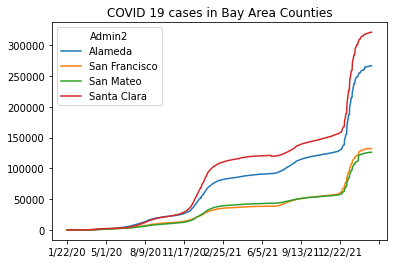

In [ ]:
plot = cases_clean[counties].plot()
plot.set_title("COVID 19 cases in Bay Area Counties")


Text(0.5, 1.0, 'COVID 19 deaths in Bay Area Counties')

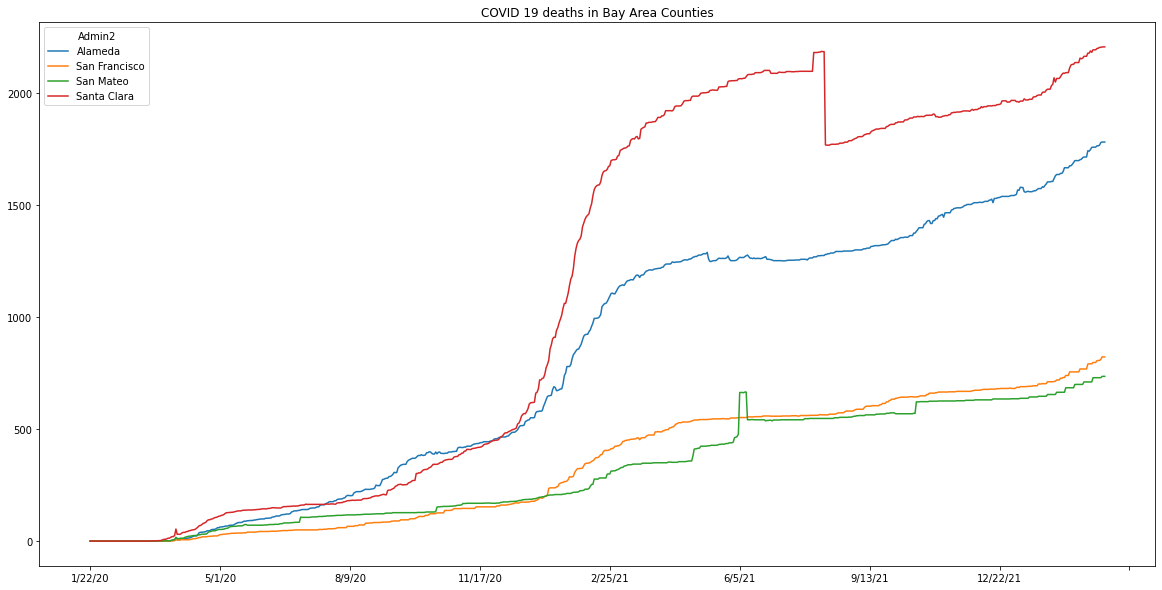

In [ ]:
plot = deaths_clean[counties].plot(figsize=(20,10))
plot.set_title("COVID 19 deaths in Bay Area Counties")


In [ ]:
pop = pd.read_csv('https://gist.githubusercontent.com/NillsF/7923a8c7f27ca98ec75b7e1529f259bb/raw/3bedefbe2e242addba3fb47cbcd239fbed16cd54/california.csv')


In [ ]:
pop.head()

,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037


In [ ]:
pop['CTYNAME'] = pop['CTYNAME'].str.replace(" County", "")

In [ ]:
pop2 = pop.drop("GrowthRate", axis=1).set_index("CTYNAME")

In [ ]:
cases_pm = cases_clean.copy()

for c in pop2.index.tolist():
    cases_pm[c] = cases_pm[c] / pop2.loc[c, : ]['Pop']
cases_pm = cases_pm * 1000000

deaths_pm = deaths_clean.copy()
for d in pop2.index.tolist():
    deaths_pm[d] = deaths_pm[d] / pop2.loc[d, : ]['Pop']
deaths_pm = deaths_pm * 1000000

In [ ]:
cases_diff = cases_clean.diff().rolling(window=7).mean()
deaths_diff = deaths_clean.diff().rolling(window=7).mean()

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases')

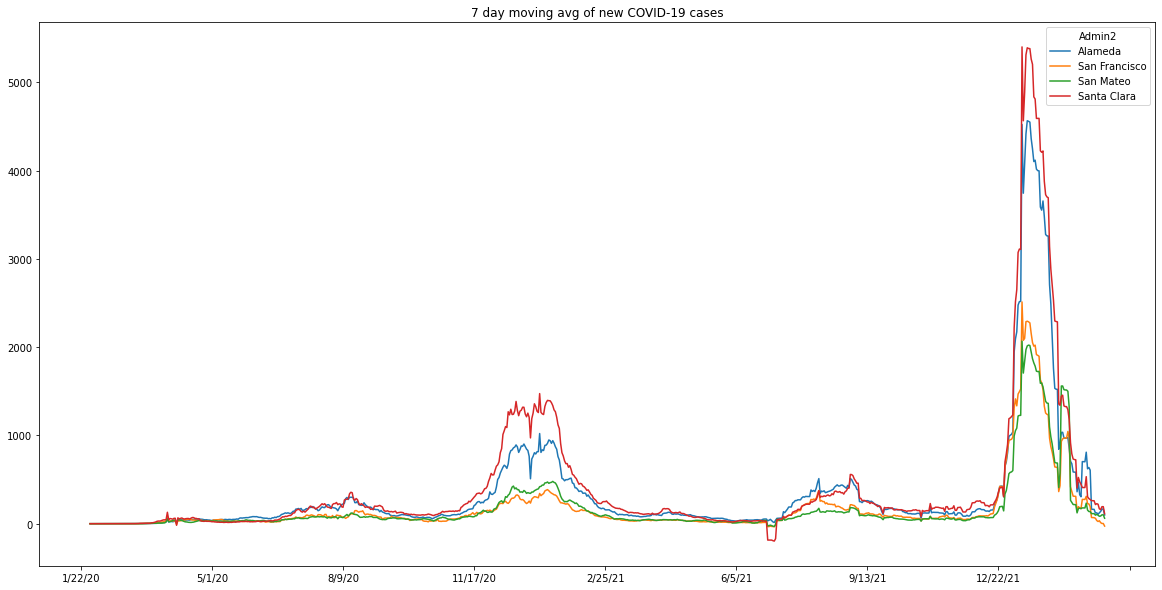

In [ ]:
plot= cases_diff[counties].plot(figsize=(20,10))
plot.set_title ("7 day moving avg of new COVID-19 cases")

Text(0.5, 1.0, '7 day moving avg of new COVID-19 deaths')

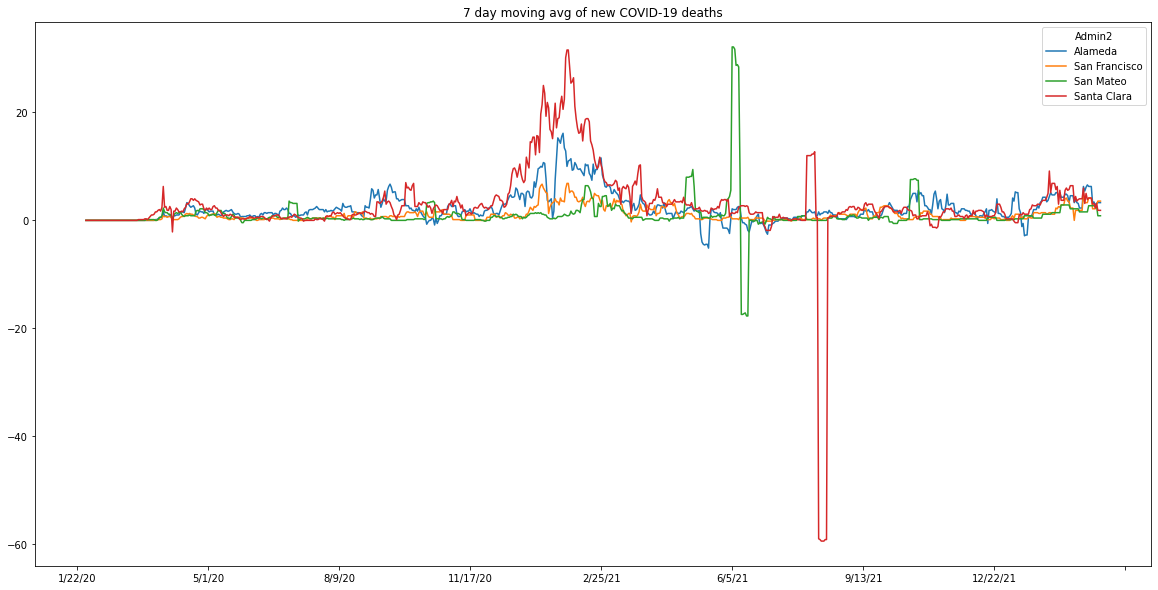

In [ ]:
plot= deaths_diff[counties].plot(figsize=(20,10))
plot.set_title ("7 day moving avg of new COVID-19 deaths")

Text(0.5, 1.0, 'Top 10 counties by COVID 19 casess per million inhabitants')

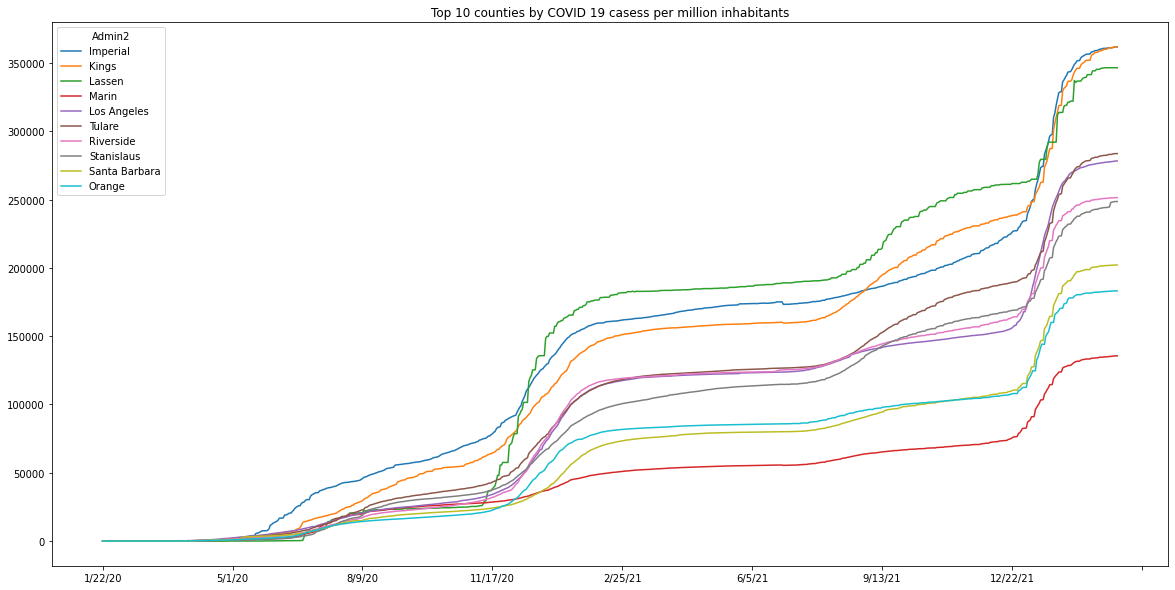

In [ ]:
plot= cases_pm.sort_values(axis = 1,by='7/20/20',ascending = False).iloc[:, : 10].plot (figsize=(20,10))
plot.set_title('Top 10 counties by COVID 19 casess per million inhabitants')

Text(0.5, 1.0, 'Top 10 counties by COVID 19 deaths per million inhabitants')

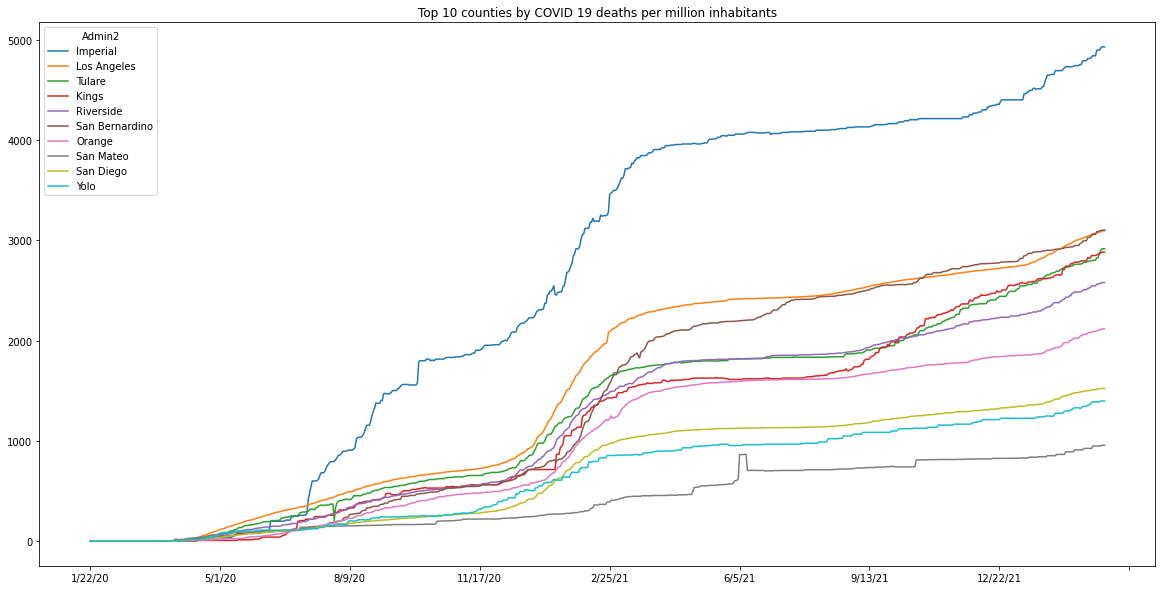

In [ ]:
plot= deaths_pm.sort_values(axis = 1,by='7/20/20',ascending = False).iloc[:, : 10].plot (figsize=(20,10))
plot.set_title('Top 10 counties by COVID 19 deaths per million inhabitants')